In [2]:
import skrf as rf
import matplotlib.pyplot as plt
import numpy as np
import cmath as cm
import math
import sympy as sp
from sympy.solvers import solve
pi = math.pi

#Prints out numbers without "np.flat64" displaying
np.set_printoptions(legacy='1.25')

Doing Complex Math

In [3]:
complex(1,1)*complex(1,-1)

(2+0j)

In [4]:
S = [[1,2,3],[4,5,6],[7,8,9]]
row=0
column=0
#Starting from 0,0
S[row][column]

1

In [5]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    if 0 < x < 10**-15 : 
        x=0
    if 0 < y < 10**-15 : 
        y=0
    return(complex(x, y))

S11 = pol2cart(0.1,math.radians(90))
S12 = pol2cart(0.4,math.radians(180))
S13 = pol2cart(0.4,math.radians(180))
S21 = pol2cart(0.4,math.radians(180))
S22 = pol2cart(0.2,math.radians(0))
S23 = pol2cart(0.6,math.radians(45))
S31 = pol2cart(0.4,math.radians(180))
S32 = pol2cart(0.6,math.radians(45))
S33 = pol2cart(0.2,math.radians(0))

S12

(-0.4+0j)

In [6]:
V1p = sp.Symbol('V1p')
V1m = sp.Symbol('V1m')
V2p = sp.Symbol('V2p')
V2m = sp.Symbol('V2m')
V3p = sp.Symbol('V3p')
V3m = sp.Symbol('V3m')


In [7]:
S = [[S11, S12, S13], [S21, S22, S23], [S31, S32, S33]]


In [8]:
numerator = (S21+(S21*S33)-(S23*S31))
denominator = (1+S33+S22+(S22*S33)-(S23*S32))
X = numerator/denominator
Gamma = (S11+S11*S33-X-X*S33-S31+S32*X)/(1+S33)
Gamma_mag = abs(Gamma)
Gamma_mag
Return_Loss = -20*math.log10(Gamma_mag)
Return_Loss

6.716086077786649

In [9]:
S32

(0.4242640687119285+0.4242640687119285j)

Problem 4, S-parameter files.
ABF-7G+

In [10]:
cable = rf.Network('E:\OneDrive\Documents\VSCodeProjects\SciKit-RF-Learning\ABF-7G+_Plus25degC.s2p')

Text(0.5, 1.0, 'Input Return Loss of ABF-7G+ Bandpass Filter')

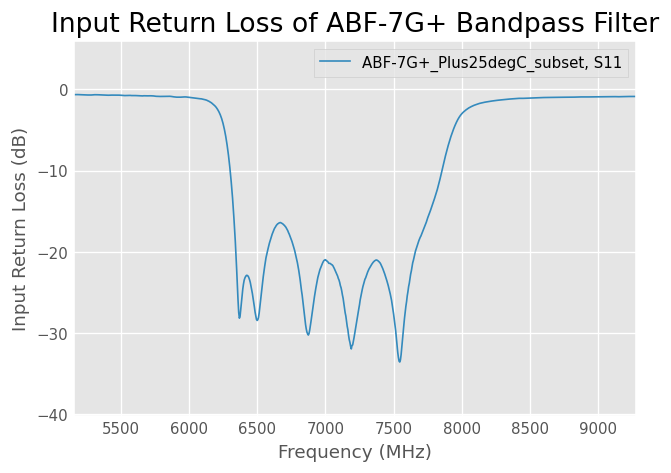

In [11]:
rf.stylely()

#S11 Plot
cable[175:700].s11.plot_s_db()
plt.ylabel('Input Return Loss (dB)')
plt.title('Input Return Loss of ABF-7G+ Bandpass Filter')

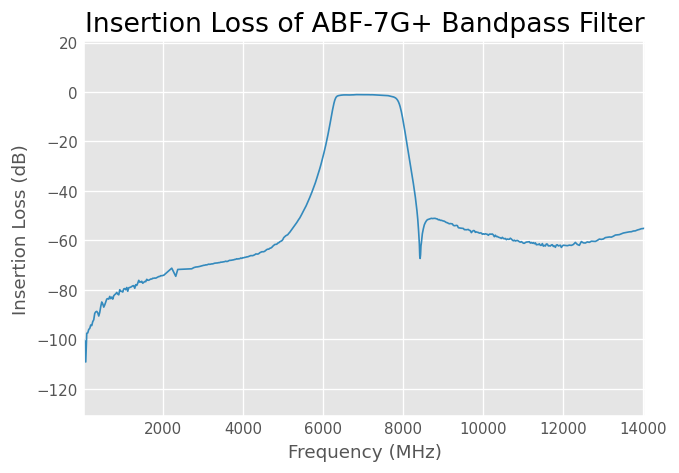

In [12]:
#S12 = S21, in this case.
cable[0:850].s12.plot_s_db()
plt.ylabel('Insertion Loss (dB)')
plt.title('Insertion Loss of ABF-7G+ Bandpass Filter')
plt.legend().remove()

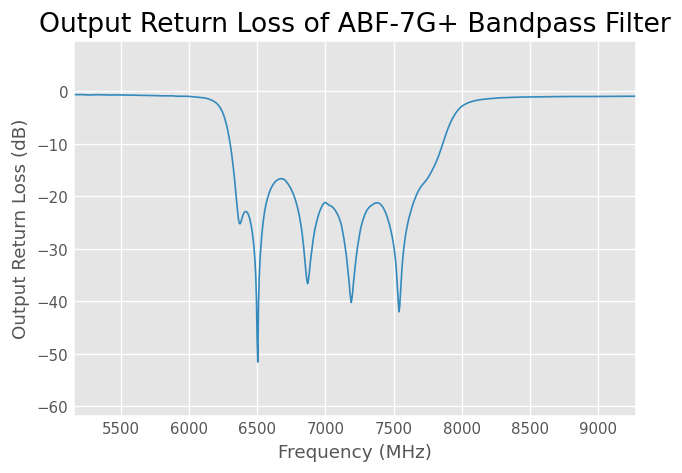

In [14]:
cable[175:700].s22.plot_s_db()
plt.ylabel('Output Return Loss (dB)')
plt.title('Output Return Loss of ABF-7G+ Bandpass Filter')
plt.legend().remove()

Text(0.5, 1.0, 'Group Delay of ABF-7G+ Bandpass Filter')

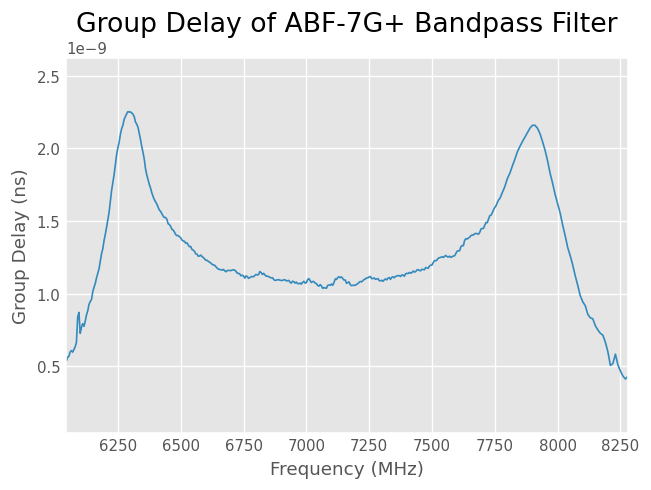

In [15]:
#phase(S21) = arctg[Im(S21)/Re(S21)]
gd = abs(cable[250:650].s21.group_delay)

cable[250:650].plot(gd)
plt.ylabel('Group Delay (ns)')
plt.title('Group Delay of ABF-7G+ Bandpass Filter')